# Python for Wine-Lovers: 2017 Wine Enthusiast Review Analysis
### Claire Boetticher and Tina Phu // MSDS 430, Fall 2018
Our project team ingested and analyzed a Kaggle dataset of 130,000 wine reviews scraped from Wine Enthusiast magazine during the week of November 22, 2017. This collection held obvious appeal as we both enjoy wine, but more importantly, offers valuable opportunities for data exploration, statistical description, quantitative analysis, text analysis, and visualizations.<br><br>
Link to original dataset: https://www.kaggle.com/zynicide/wine-reviews

## Imports, Data Ingestion, and DataFrame Creation

In [45]:
import pandas as pd
import numpy as np
import re
import math
import string
import matplotlib as plt
import matplotlib.pyplot as pyplt
import matplotlib.ticker as mtick
import nltk
import itertools
import collections
import seaborn as sns

In [46]:
# read csv file into dataframe
columns = ['Country', 'Description', 'Designation', 'Points', 'Price', 'Province', 
           'Region_1', 'Region_2', 'Taster_name', 'Taster_twitter_handle', 'Title', 'Variety', 'Winery']

df = pd.read_csv('./winemag-data.csv', delimiter=',', skiprows = 1, engine='python', 
                 sep="\s+", header = None, names = columns)
# display first 5 records
df.head()

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_name,Taster_twitter_handle,Title,Variety,Winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [47]:
'''extract years from Title'''
# Some Titles contain two sets of 4-digit characters, we need to extract both and compare.
# The larger set of 4-digit characters is most likely the string to use.
yearlist = []

# This function pulls all numbers from a string into a list
def NumberFromStrings(string):
    numberfromstring = re.findall('\d+',string)
    return numberfromstring

for item in df['Title']:
    # Return numbers from each wine name as a list
    ylist = NumberFromStrings(item)
    # Get only numbers of length 4
    ylist = [i for i in ylist if len(i) == 4]
    # Check if length of list of 4-digit numbers is greater than or equal to 1, and the digits are greater than year 1800.
    # If 1, then it's the year.
    # If not, take larger number as year unless it's greater than 2018
    if len(ylist)==1 and int(ylist[0]) > 1800:
        year = ylist[0]
        yearlist.append(year)
    elif len(ylist)>1:
        val1 = ylist[0]
        val2 = ylist[1]
        if (val1 > val2) and int(val1) < 2018:
            year = val1
        elif int(val2) > 2020:
            year = val1
        else:
            year=val2
        yearlist.append(year)
    else:
        yearlist.append("No year")

# create new column and display first 5 records
df['Year0'] = yearlist
df.head()

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_name,Taster_twitter_handle,Title,Variety,Winery,Year0
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [48]:
# explore data types for columns in df. Notice that year is in string format.
df.dtypes

Country                   object
Description               object
Designation               object
Points                     int64
Price                    float64
Province                  object
Region_1                  object
Region_2                  object
Taster_name               object
Taster_twitter_handle     object
Title                     object
Variety                   object
Winery                    object
Year0                     object
dtype: object

In [49]:
# Year is in string format. We need to convert it to date.
new_year=[]

def str_to_year(z):
    z = str(z)
    z = pd.to_datetime(z, format='%Y')
    z = int(z.year)
    return z

# If string is "No year", set as 0. Otherwise convert to date format.
for year in df['Year0']:
    if year=='No year':
        year2 = 0
        new_year.append(year2)
    else:
        year2 = str_to_year(year)
        new_year.append(year2)

# create new column and display first 5 records
df['Year'] = new_year
df.head()

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_name,Taster_twitter_handle,Title,Variety,Winery,Year0,Year
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia,2013,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,2012


## DataFrame Exploration and Summary Statistics

In [50]:
# explore number of rows by number of columns in df
df.shape

(129971, 15)

In [51]:
# explore data types for columns in df. Confirm that final 'Year' column is not string.
df.dtypes

Country                   object
Description               object
Designation               object
Points                     int64
Price                    float64
Province                  object
Region_1                  object
Region_2                  object
Taster_name               object
Taster_twitter_handle     object
Title                     object
Variety                   object
Winery                    object
Year0                     object
Year                       int64
dtype: object

In [52]:
# describe data for numeric fields
# provides counts and unique values + summary statistics
df.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designation,92506,37976,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
Price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
Province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# From the data above, we see the record count is 129971, but there are 119955 unique 
# desriptions, so we think there is duplicate data. 
# We deduplicate the data and find values reduced
df = df.drop_duplicates()
df.shape

(119988, 15)

In [54]:
# Describe the data again to see updated counts
df.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,119929,43,US,50457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,119988,119955,"Hugely delicious, just a joy to drink. So soft...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designation,85443,37976,Reserve,1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Points,119988,NaN,NaN,NaN,88.4422,3.09292,80,86,88,91,100
Price,111593,NaN,NaN,NaN,35.6207,42.1037,4,17,25,42,3300
Province,119929,425,California,33656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_1,100428,1229,Napa Valley,4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_2,46769,17,Central Coast,10233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taster_name,95071,19,Roger Voss,23560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taster_twitter_handle,90542,15,@vossroger,23560,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Reviews')

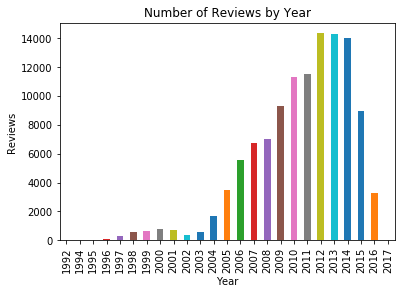

In [55]:
# plot the years series to show reviews by year
years = pd.Series(data=df['Year'])
years.sort_values(ascending=True)
ax = years.value_counts()[:30].sort_index()[5:].plot('bar', title='Number of Reviews by Year')
ax.set_xlabel("Year")
ax.set_ylabel("Reviews")

In [56]:
# correlation between points and price
df['Points'].corr(df['Price'])

0.41653398334645436

In [57]:
# covariance between points and price
df['Points'].cov(df['Price'])

54.34504247486709

## Summary Data for Select Dimension Combinations

In [58]:
# get Price summary statistics for each Point level

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

    
df2 = df.groupby('Points')
print(color.BOLD + "Summary of price data for each point level:" + color.END)
df2['Price'].describe()

Summary of price data for each point level:


,count,mean,std,min,25%,50%,75%,max
Points,,,,,,,,
80,395.0,16.372152,8.476347,5.0,11.00,14.0,19.00,69.0
81,677.0,17.144756,11.892008,5.0,10.00,14.0,20.00,130.0
82,1750.0,18.902857,11.051144,4.0,12.00,15.0,24.00,150.0
83,2830.0,18.243816,11.581573,4.0,11.00,15.0,22.00,225.0
84,5860.0,19.248976,12.719335,4.0,12.00,15.0,23.00,225.0
85,8470.0,20.016529,13.188649,4.0,12.00,16.0,24.00,320.0
86,10748.0,22.120674,14.007935,4.0,13.00,18.0,26.00,170.0
87,14225.0,24.921265,18.642030,5.0,15.00,20.0,30.00,800.0
88,14209.0,28.798860,32.818640,6.0,17.00,24.0,35.00,3300.0


In [59]:
# Average price for each country, province, and variety combination, with NaN values removed
# Sort by descending price to see most expensive wine variety by province and country.
df_cleaned = df[df['Price'].notnull()]
averages = df_cleaned.groupby(['Country','Province','Variety'])['Price'].mean()
averages = pd.DataFrame(averages)
averages = averages.sort_values(by='Price', ascending=False)
averages.columns = ['Average Price']
print(averages)

                                                         Average Price
Country     Province          Variety                                 
Portugal    Colares           Ramisco                       495.000000
Romania     VÃ¢nju Mare       Riesling                      320.000000
US          Michigan          Cabernet Sauvignon            250.000000
Australia   Western Australia Malbec                        250.000000
Portugal    Madeira           Terrantez                     236.000000
Italy       Central Italy     Grenache                      230.000000
Portugal    Madeira           Verdelho                      220.000000
Spain       Northern Spain    Petit Verdot                  199.000000
            Catalonia         Carignan                      182.555556
Australia   Victoria          Muscadelle                    160.333333
Switzerland Switzerland       Pinot Noir                    160.000000
Italy       Sicily & Sardinia Francisa                      160.000000
Austra

In [60]:
# Average price by year
df_year = df.loc[df['Year'] != 0]
df2 = df_year.groupby('Year')
print("Summary of Price Data by Wine Year:")
df2['Price'].describe()

Summary of Price Data by Wine Year:


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1821,4.0,14.500000,1.000000,13.0,14.50,15.0,15.00,15.0
1827,2.0,17.000000,4.242641,14.0,15.50,17.0,18.50,20.0
1847,1.0,26.000000,NaN,26.0,26.00,26.0,26.00,26.0
1868,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,1.0,22.000000,NaN,22.0,22.00,22.0,22.00,22.0
1882,2.0,10.000000,0.000000,10.0,10.00,10.0,10.00,10.0
1887,2.0,13.000000,0.000000,13.0,13.00,13.0,13.00,13.0
1904,1.0,40.000000,NaN,40.0,40.00,40.0,40.00,40.0
1919,1.0,13.000000,NaN,13.0,13.00,13.0,13.00,13.0


Summary of price data for each point level:


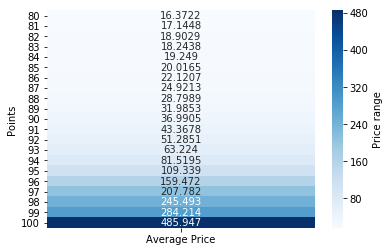

In [61]:
# get Price summary statistics for each Point level
df_cleaned = df[df['Price'].notnull()]
print("Summary of price data for each point level:")

average_price = df_cleaned.groupby('Points')['Price'].mean()
average_price = pd.DataFrame(average_price)
average_price.columns = ['Average Price']

cm = sns.light_palette("green", as_cmap=True)

# We can use two methods to create a color-coded table of average price by point level
s = average_price.style.background_gradient(cmap=cm)

s2 = sns.heatmap(average_price, annot=True, fmt="g", cmap='Blues',
                 cbar_kws={'label': 'Price range'})

# Display the result for the second method
s2

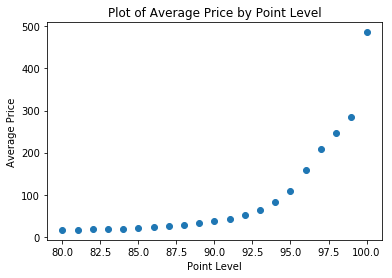

In [62]:
# Convert above chart to plot format to see how much price rises as point level goes up

average_price.reset_index(inplace=True)
x = average_price['Points']
y = average_price['Average Price']
pyplt.scatter(x, y)
pyplt.ylabel('Average Price')
pyplt.xlabel('Point Level')
pyplt.title('Plot of Average Price by Point Level', fontdict=None, loc='center', pad=None)
pyplt.show()

Summary of price data for each year:


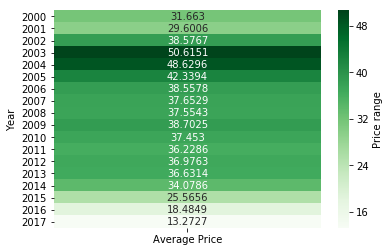

In [63]:
# get Price summary statistics for each year after 2000
df_cleaned = df[df['Price'].notnull()]
print("Summary of price data for each year:")

df_2k = df[df['Year'] >= 2000]
average_price_year = df_2k.groupby('Year')['Price'].mean()
average_price_year = pd.DataFrame(average_price_year)
average_price_year.columns = ['Average Price']

cm = sns.light_palette("green", as_cmap=True)

# We can use two methods to create a color-coded table of average price by year
s = average_price_year.style.background_gradient(cmap=cm)

s2 = sns.heatmap(average_price_year, annot=True, fmt="g", cmap='Greens',
                 cbar_kws={'label': 'Price range'})

s2

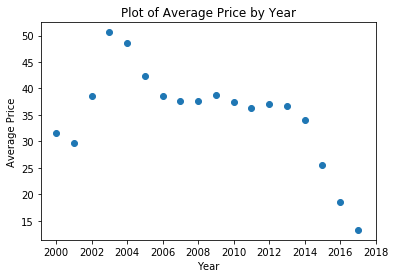

In [64]:
# Convert above chart to plot format to see how much price changes by year

average_price_year.reset_index(inplace=True)
x = average_price_year['Year']
y = average_price_year['Average Price']
pyplt.scatter(x, y)
pyplt.ylabel('Average Price')
pyplt.xlabel('Year')
pyplt.xticks(np.arange(2000,2019, step=2))
pyplt.title('Plot of Average Price by Year', fontdict=None, loc='center', pad=None)
pyplt.show()

## Data Exploration by Unique Values

In [65]:
# explore unique values: Designation
df['Designation'].unique()

array(['VulkÃ\xa0 Bianco', 'Avidagos', nan, ...,
       'Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec', 'Irongate',
       'Lieu-dit Harth CuvÃ©e Caroline'], dtype=object)

In [66]:
# explore unique values: Province
df['Province'].unique()

array(['Sicily & Sardinia', 'Douro', 'Oregon', 'Michigan',
       'Northern Spain', 'Alsace', 'Rheinhessen', 'California', 'Mosel',
       'Other', 'Mendoza Province', 'Virginia', 'Beaujolais',
       'Colchagua Valley', 'Southern Italy', 'Maule Valley', 'Bordeaux',
       'Maipo Valley', 'Washington', 'Central Italy', 'Champagne',
       'Burgundy', 'South Australia', 'Tejo', 'Rapel Valley', 'Galicia',
       'France Other', 'Tuscany', 'Burgenland', 'New York',
       'Leyda Valley', 'Piedmont', 'Stellenbosch',
       'Simonsberg-Stellenbosch', 'Walker Bay', 'Alentejano',
       'Central Spain', 'Southwest France', 'Aconcagua Valley',
       'Loncomilla Valley', 'Marlborough', 'Northeastern Italy',
       'Casablanca Valley', 'Veneto', 'Western Cape', 'Judean Hills',
       'Alentejo', 'Coastal Region', 'RhÃ´ne Valley', 'Galilee',
       'Beira Atlantico', 'Tokaj', 'Leithaberg', 'Santorini', 'Kremstal',
       'Catalonia', 'Recas', "Hawke's Bay", 'CuricÃ³ Valley',
       'LimarÃ\xad V

In [67]:
# explore unique values: Taster_name
df['Taster_name'].unique()

array(['Kerin Oâ€™Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne KrebiehlÂ\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [68]:
# explore unique values: Title
df['Title'].unique()

array(['Nicosia 2013 VulkÃ\xa0 Bianco  (Etna)',
       'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
       'Rainstorm 2013 Pinot Gris (Willamette Valley)', ...,
       'Domaine Gresser 2013 Kritt Gewurztraminer (Alsace)',
       'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)',
       'Domaine Schoffit 2012 Lieu-dit Harth CuvÃ©e Caroline Gewurztraminer (Alsace)'],
      dtype=object)

In [69]:
# explore unique values: Variety
df['Variety'].unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'GewÃ¼rztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'CarmenÃ¨re', 'AlbariÃ±o', 'Petit Manseng',
       'RosÃ©', 'Zinfandel', 'Vernaccia', 'Rosato', 'GrÃ¼ner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'RhÃ´ne-style Red Blend', 'Portuguese White',
       'Graciano', 'Tannat-Cabernet', 'S

In [70]:
# explore unique values: Winery
df['Winery'].unique()

array(['Nicosia', 'Quinta dos Avidagos', 'Rainstorm', ...,
       'Mas de Pampelonne', 'Bodegas Eidosela', 'Penedo Borges'],
      dtype=object)

## Text Exploration and Summary Calculations
The Description field contains taster notes and impressions of various wines. This field offers an opportunity for analysis of word frequencies, patterns of words used, and specific language related to a particular country, variety, or other dimension.

As a subjective impression, the description also offers an interesting basis for sentiment analysis. Calculated as a numeric score, review sentiment can be analyzed in conjunction with other dimensions and data points, such as year, price, points, and others.

In [71]:
# word count for description field to give information on longest and shortest values
df['Description_count'] = df['Description'].apply(lambda x: len(str(x).split(" ")))

print('Minimum word count for Description: ' + str(df['Description_count'].min()))
print('Maximum word count for Description: ' + str(df['Description_count'].max()))

Minimum word count for Description: 3
Maximum word count for Description: 135


In [72]:
# average word length for descriptions
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

# apply function and add calculated average as a column
df['Avg_description'] = df['Description'].apply(lambda x: avg_word(x))

# display subset of frame
df[['Description', 'Description_count', 'Avg_description']][:20]

,Description,Description_count,Avg_description
0,"Aromas include tropical fruit, broom, brimston...",24,6.208333
1,"This is ripe and fruity, a wine that is smooth...",39,4.973684
2,"Tart and snappy, the flavors of lime flesh and...",28,5.678571
3,"Pineapple rind, lemon pith and orange blossom ...",33,5.060606
4,"Much like the regular bottling from 2012, this...",41,5.097561
5,Blackberry and raspberry aromas show a typical...,42,5.238095
6,"Here's a bright, informal red that opens with ...",31,4.870968
7,This dry and restrained wine offers spice in p...,21,4.857143
8,Savory dried thyme notes accent sunnier flavor...,24,5.541667
9,This has great depth of flavor with its fresh ...,30,4.366667


## Text Pre-Processing for Natural Language Processing Tasks
The following code prepares text from the Description field for further analysis. Steps include:<br>
 - Convert all words to lower-case to standardize
 - Remove punctuation 
 - Remove stopwords, except hypthens (to preserve compound adjectives, e.g., "oak-driven")


In [73]:
# lower-case text in descriptions to enable clean analysis across text and tokens
df['Description'] = df['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Description'].head()

0    aromas include tropical fruit, broom, brimston...
1    this is ripe and fruity, a wine that is smooth...
2    tart and snappy, the flavors of lime flesh and...
3    pineapple rind, lemon pith and orange blossom ...
4    much like the regular bottling from 2012, this...
Name: Description, dtype: object

In [74]:
# remove punctuation for further text analysis
# keep hyphens so that compound adjectives are preserved (e.g., oak-driven)
remove = string.punctuation
remove = remove.replace("-", "")
pattern = r"[{}]".format(remove)
df['Description'] = df['Description'].str.replace(pattern,'')
# display first 5 records to check for removal
df['Description'][:5]

0    aromas include tropical fruit broom brimstone ...
1    this is ripe and fruity a wine that is smooth ...
2    tart and snappy the flavors of lime flesh and ...
3    pineapple rind lemon pith and orange blossom s...
4    much like the regular bottling from 2012 this ...
Name: Description, dtype: object

In [75]:
# remove stopwords using NLTK
stop = nltk.corpus.stopwords.words('english')
df['Description'] = df['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# df.iloc[7]['Description']

## Word Occurrence Exploration 
The following code enables exploration of word occurrence by frequency and of particular words of interest in the Description field.

In [76]:
# check for commonly-occuring words after stopword removal
# create frequency series
freq = pd.Series(' '.join(df['Description']).split()).value_counts()[:30]

# from freq, create series of n largest for visualization
top_freq = freq.nlargest(20)
top_freq

wine       72132
flavors    57953
fruit      41564
aromas     36242
palate     34725
finish     32123
acidity    32101
tannins    28442
drink      27546
cherry     25132
ripe       24767
black      23343
notes      17454
spice      17303
red        17289
rich       16049
fresh      15524
nose       15476
oak        15384
dry        14294
dtype: int64

Text(0,0.5,'Number of Occurences of Word')

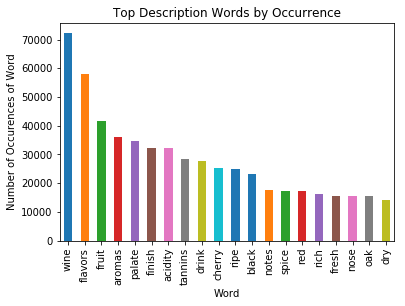

In [77]:
# frequency plot for top-occuring words in Description
ax = top_freq.plot(kind='bar', ax=None, rot=90, title='Top Description Words by Occurrence')
ax.set_xlabel("Word")
ax.set_ylabel("Number of Occurences of Word")

In [78]:
# create rarest word series to explore words that only occur once
freq_rare = pd.Series(' '.join(df['Description']).split()).value_counts()[-20:]
freq_rare

bulkyâ€”a              1
shish                  1
groto                  1
betweenâ€”not          1
seafoodâ€”like         1
carm-cabernet-syrah    1
prosciutto-like        1
originals              1
summed                 1
frothes                1
knowingly              1
lockded-down           1
periodic               1
vignavecchia           1
volatile-smelling      1
olive-dominated        1
erasmo                 1
mid-amber              1
mionettos              1
gneiss                 1
dtype: int64

In [79]:
# for exploration: code for finding records that contain certain strings
print(df[df['Description'].str.contains("gasoline")]['Description'])

29923     strong whiff gasoline andor diesel pure petrol...
35267     like certain rieslings smells lot like gasolin...
45599     curious blend 61 riesling 39 sauvignon blanc m...
45715     austria-trained santa barbara county-based win...
57086     30 years making dry alsatian wines edna valley...
64375     straightforward modern dry riesling wine shows...
66001     aromas gasoline white grapefruit skins lead ta...
73421     initial aromas gasoline give way briny scents ...
79702     aromas waxy stone fruits gasoline announce win...
109403    sure whats going bottles cab smelled diesel ga...
117352    mild whiff gasoline typical riesling also smel...
Name: Description, dtype: object


## Bigram Analysis
A bigram or digram is a sequence of two adjacent elements from a string of tokens. A bigram is an n-gram for n=2.</br>
Bigrams are useful for developing features for supervised machine learning models. For this project, we aimed to write code to effectively create bigrams and then use them for some basic frequency analysis. This could be used for pre-processing other textual data for future modeling.<br>
Reference:__[Text Mining, Analytics, & More](http://text-analytics101.rxnlp.com/2014/11/what-are-n-grams.html)__

In [80]:
# define a bigrams function to create a list of all bigrams across Description field
# create a list of bigrams across the dataset

my_list = df['Description'].tolist()
def find_bigrams(my_list):
  bigram_list = []
  for i in range(len(my_list)-1):
      bigram_list.append((my_list[i], my_list[i+1]))
  return bigram_list

bigram_list = []
for i in df['Description']:
    for j in find_bigrams(i.split(' ')):
        bigram_list.append(j)

In [81]:
# display number of total bigrams and number of unique bigrams
print('Total bigrams across all Description fields: ' + str(len(bigram_list)))
print('Unique bigrams across all Description fields: ' + str(len(set(bigram_list))))

Total bigrams across all Description fields: 2884211
Unique bigrams across all Description fields: 852232


In [82]:
# find most frequently occurring bigrams (top 30)
counter=collections.Counter(bigram_list)
print(counter.most_common(30))

[(('black', 'cherry'), 6770), (('fruit', 'flavors'), 5331), (('cabernet', 'sauvignon'), 4640), (('palate', 'offers'), 3797), (('ready', 'drink'), 3765), (('pinot', 'noir'), 2882), (('black', 'pepper'), 2526), (('white', 'pepper'), 2309), (('black', 'currant'), 2271), (('black', 'fruit'), 2196), (('cabernet', 'franc'), 2179), (('finish', 'drink'), 2122), (('firm', 'tannins'), 2112), (('nose', 'palate'), 2036), (('red', 'cherry'), 2018), (('red', 'berry'), 1992), (('crisp', 'acidity'), 1932), (('black', 'fruits'), 1932), (('palate', 'delivers'), 1893), (('green', 'apple'), 1867), (('bright', 'acidity'), 1861), (('drink', '2018'), 1820), (('red', 'fruit'), 1787), (('fresh', 'acidity'), 1783), (('flavors', 'finish'), 1761), (('wine', 'shows'), 1752), (('fruity', 'wine'), 1745), (('stone', 'fruit'), 1735), (('sauvignon', 'blanc'), 1725), (('berry', 'fruits'), 1722)]


Text(0,0.5,'Number of Occurrences of Bigram')

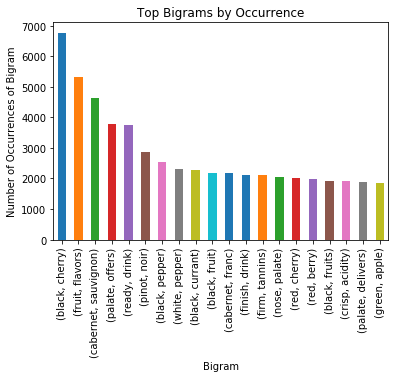

In [83]:
# plot the most common bigrams in the dataset
bigram_series = pd.Series(bigram_list)
ax = bigram_series.value_counts()[:20].plot('bar', title='Top Bigrams by Occurrence')
ax.set_xlabel("Bigram")
ax.set_ylabel("Number of Occurrences of Bigram")

## Tokenization and Sentiment Analysis
A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing. We tokenized the Description field to prepare it for sentiment analysis, so that only the most "meaningful" words would factor into the calculation.<br>
(Reference: __["Tokenization" from Stanford NLP Group](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)__) <br><br>
We then used the VADER SentimentAnalyzer from NLTK to create a compound, positive, neutral, and negative score for each Description. Sentiment, especially for subjective wine reviews, struck us as an interesting and useful numeric data point to have for reviews to see how sentiment correlated with other variables such as price, points, and vintage year.<br>
(Reference: __["VADER: A parsimonious rule-based model for sentiment analysis of social media text](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)__)<br>
(Reference: __["Explanation of polarity score](https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk)__)

In [84]:
# tokenize Description field 
df['tokenized_desc'] = df.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)
# display first 10 tokenized descriptions 
df['tokenized_desc'][:10]
#     df.iloc[7]['tokenized_desc']

0    [aromas, include, tropical, fruit, broom, brim...
1    [ripe, fruity, wine, smooth, still, structured...
2    [tart, snappy, flavors, lime, flesh, rind, dom...
3    [pineapple, rind, lemon, pith, orange, blossom...
4    [much, like, regular, bottling, 2012, comes, a...
5    [blackberry, raspberry, aromas, show, typical,...
6    [heres, bright, informal, red, opens, aromas, ...
7    [dry, restrained, wine, offers, spice, profusi...
8    [savory, dried, thyme, notes, accent, sunnier,...
9    [great, depth, flavor, fresh, apple, pear, fru...
Name: tokenized_desc, dtype: object

In [85]:
# create token list and loop through data
token_list = []

for i in df['tokenized_desc']:
    for j in i:
        token_list.append(j) 

In [86]:
# display all tokens and unique tokens
print('Number of tokens across all Description fields: ' + str(len(token_list)))
print('Number of unique tokens across all Description fields: ' + str(len(set(token_list))))

Number of tokens across all Description fields: 3024883
Number of unique tokens across all Description fields: 45379


In [87]:
# sentiment analysis with NLTK VADER
# use compound as sentiment score for DataFrame

# Will need to download 'vader_lexicon'
nltk.download('vader_lexicon')

# define function for score calculation
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

# define dataset for new DataFrame and apply function
# dataset = df['Description'][:100]
dataset = df['Description']

# run sentiment analysis and create new DataFrame with results
nltk_results = [nltk_sentiment(row) for row in dataset]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(dataset, columns = ['Description'])
nltk_df = text_df.join(results_df)

# display first 5 records
nltk_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tina\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Description,compound,neg,neu,pos
0,aromas include tropical fruit broom brimstone ...,0.1531,0.000,0.926,0.074
1,ripe fruity wine smooth still structured firm ...,0.6486,0.000,0.782,0.218
2,tart snappy flavors lime flesh rind dominate g...,-0.1280,0.086,0.914,0.000
3,pineapple rind lemon pith orange blossom start...,0.3400,0.000,0.893,0.107
4,much like regular bottling 2012 comes across r...,0.8176,0.000,0.721,0.279


In [88]:
# join nltk DataFrame columns to original DataFrame to have all data combined in one
df = pd.merge(df, nltk_df, how='outer')

# display first 5 records
df.head()

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Taster_name,Taster_twitter_handle,...,Winery,Year0,Year,Description_count,Avg_description,tokenized_desc,compound,neg,neu,pos
0,Italy,aromas include tropical fruit broom brimstone ...,VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,@kerinokeefe,...,Nicosia,2013,2013,24,6.208333,"[aromas, include, tropical, fruit, broom, brim...",0.1531,0.000,0.926,0.074
1,Portugal,ripe fruity wine smooth still structured firm ...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,...,Quinta dos Avidagos,2011,2011,39,4.973684,"[ripe, fruity, wine, smooth, still, structured...",0.6486,0.000,0.782,0.218
2,US,tart snappy flavors lime flesh rind dominate g...,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,...,Rainstorm,2013,2013,28,5.678571,"[tart, snappy, flavors, lime, flesh, rind, dom...",-0.1280,0.086,0.914,0.000
3,US,pineapple rind lemon pith orange blossom start...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,...,St. Julian,2013,2013,33,5.060606,"[pineapple, rind, lemon, pith, orange, blossom...",0.3400,0.000,0.893,0.107
4,US,much like regular bottling 2012 comes across r...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,...,Sweet Cheeks,2012,2012,41,5.097561,"[much, like, regular, bottling, 2012, comes, a...",0.8176,0.000,0.721,0.279


In [89]:
# re-describe DataFrame with added numeric data
df.describe()

,Points,Price,Year,Description_count,Avg_description,compound,neg,neu,pos
count,120072.000000,111663.000000,120072.000000,120072.000000,120072.000000,111472.000000,111472.000000,111472.000000,111472.000000
mean,88.442068,35.621513,1939.049162,40.421597,5.055714,0.521840,0.021728,0.779037,0.199232
std,3.092782,42.095332,372.413056,11.203481,0.400947,0.364969,0.046142,0.130330,0.131414
min,80.000000,4.000000,0.000000,3.000000,3.703704,-0.928800,0.000000,0.118000,0.000000
25%,86.000000,17.000000,2008.000000,33.000000,4.775000,0.318200,0.000000,0.689000,0.103000
50%,88.000000,25.000000,2011.000000,40.000000,5.032258,0.636900,0.000000,0.782000,0.194000
75%,91.000000,42.000000,2013.000000,47.000000,5.310345,0.817600,0.000000,0.874000,0.291000
max,100.000000,3300.000000,2017.000000,135.000000,8.200000,0.989200,0.675000,1.000000,0.800000


(1990, 2018)

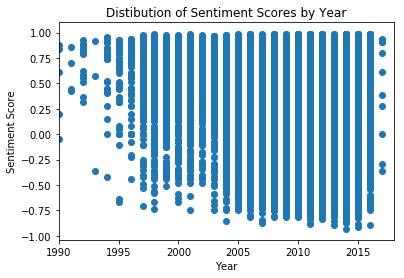

In [90]:
# explore data creating array of sentiment score by year for each record
arr = np.array(df[['Year', 'compound']])
x,y = zip(*arr)
pyplt.scatter(*zip(*arr))
pyplt.ylabel('Sentiment Score')
pyplt.xlabel('Year')
pyplt.title('Distibution of Sentiment Scores by Year', fontdict=None, loc='center', pad=None)
pyplt.xlim([1990, 2018])

Text(0,0.5,'Price')

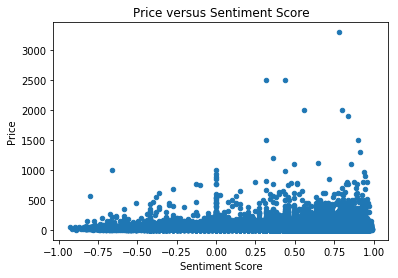

In [91]:
# price versus sentiment score scatterplot
ax = df.plot(x='compound', y='Price', kind='scatter', title='Price versus Sentiment Score')
ax.set_xlabel("Sentiment Score")
ax.set_ylabel("Price")

Text(0,0.5,'Points')

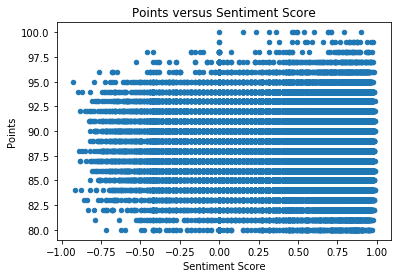

In [92]:
# points versus sentiment scatterplot
ax = df.plot(x='compound', y='Points', kind='scatter', title='Points versus Sentiment Score')
ax.set_xlabel("Sentiment Score")
ax.set_ylabel("Points")

# JUNK

Text(0.5,1,'Distibution of Wine Price by Point Level')

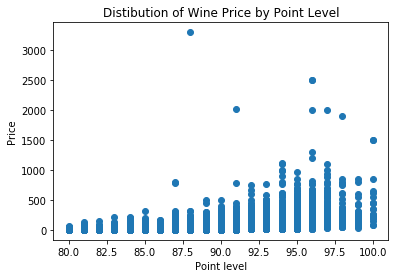

In [93]:
# DO WE NEED THIS ONE?
# explore data creating array of price & point data for each record
# create scatter plot out of array 
arr = np.array(df[['Points', 'Price']])
x,y = zip(*arr)
pyplt.scatter(*zip(*arr))
pyplt.ylabel('Price')
pyplt.xlabel('Point level')
pyplt.title('Distibution of Wine Price by Point Level', fontdict=None, loc='center', pad=None)

Text(0.5,1,'Scatterplot of Wines by Year and Price')

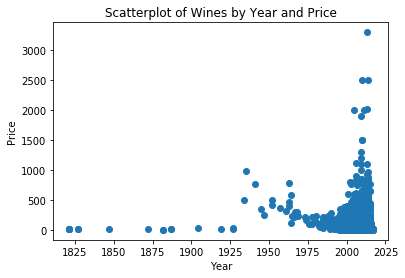

In [94]:
# I DON'T THINK WE NEED THIS ONE NOW THAT YOU HAVE THE HEAT TABLES...?
# explore data creating array of price & point data for each record, and create scatter plot out of array

arr = np.array(df_year[['Year', 'Price']])
x,y = zip(*arr)
pyplt.scatter(*zip(*arr))
pyplt.ylabel('Price')
pyplt.xlabel('Year')
pyplt.title('Scatterplot of Wines by Year and Price', fontdict=None, loc='center', pad=None)

In [95]:
# # top tokens by occurrence
# token_series = pd.Series(token_list)
# ax = token_series.value_counts()[:20].plot('bar', title='Top Tokens by Occurrence')
# ax.set_xlabel("Token")
# ax.set_ylabel("Number of Occurrences of Token")